In [3]:
import tensorflow as tf
tf.__version__

'2.4.0'

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [13]:
cd/content/drive/MyDrive/DACN

/content/drive/MyDrive/DACN


In [14]:
pwd


'/content/drive/MyDrive/DACN'

In [ ]:
data = "./"

In [ ]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [ ]:
import pickle
with open(train_link, mode="rb") as f:
  train = pickle.load(f)
with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)
with open(test_link, mode="rb") as f:
  test = pickle.load(f)

In [ ]:
test

{'coords': array([[ 6,  5, 48, 49],
        [ 5,  5, 36, 40],
        [ 6,  6, 43, 47],
        ...,
        [ 6,  6, 24, 24],
        [ 5,  6, 43, 44],
        [ 6,  5, 27, 26]], dtype=uint8), 'features': array([[[[116, 139, 174],
          [116, 137, 171],
          [118, 138, 172],
          ...,
          [ 98, 114, 143],
          [ 97, 121, 147],
          [ 85, 105, 130]],
 
         [[115, 142, 176],
          [115, 140, 174],
          [117, 141, 175],
          ...,
          [119, 143, 176],
          [120, 141, 173],
          [120, 139, 171]],
 
         [[117, 141, 174],
          [117, 142, 175],
          [114, 140, 172],
          ...,
          [120, 144, 179],
          [122, 144, 179],
          [120, 143, 177]],
 
         ...,
 
         [[117, 137, 167],
          [115, 134, 164],
          [117, 135, 164],
          ...,
          [115, 137, 169],
          [116, 136, 168],
          [118, 139, 172]],
 
         [[116, 136, 166],
          [114, 134, 168],
     

In [ ]:
import matplotlib.pyplot as plt

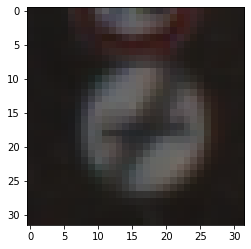

In [ ]:
trainX = train["features"]
plt.imshow(trainX[0])

In [ ]:
trainY = train["labels"]

In [ ]:
trainX.shape

(34799, 32, 32, 3)

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [ ]:
trainY[0]

41

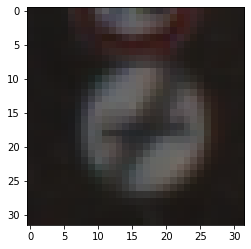

In [ ]:
plt.imshow(trainX[0])

In [ ]:
classNames[trainY[92]]

'End of no passing'

In [ ]:
from sklearn.utils import shuffle
trainX, trainY = shuffle(trainX,trainY)

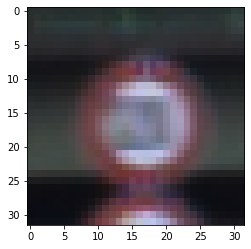

In [ ]:
plt.imshow(trainX[0])

In [ ]:
classNames[trainY[0]]

'Speed limit (120km/h)'

In [ ]:
validX = valid["features"]
validY = valid["labels"]

In [ ]:
testX = test['features']
testY = test['labels']

In [ ]:
trainX = trainX.astype("float")/ 255.0
validX = validX.astype("float")/ 255.0
testX = testX.astype("float")/ 255.0

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)


In [ ]:
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()

In [ ]:
width = 32 
height = 32
classes = 43

In [ ]:
shape = (width, height , 3)

In [ ]:
model.add(Conv2D(32, (3,3), padding="same", input_shape=shape))

In [ ]:
model.add(Activation("relu"))
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(32, (3,3), padding="same"))

In [ ]:
model.add(Activation("relu"))
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(32, (3,3), padding="same"))

In [ ]:
model.add(Activation("relu"))
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9

In [ ]:
model.add(Conv2D(64, (3,3), padding="same"))

In [ ]:
model.add(Activation("relu"))
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64, (3,3), padding="same"))

In [ ]:
model.add(Activation("relu"))
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512))

In [ ]:
model.add(Activation("relu"))
model.add(BatchNormalization())

In [ ]:
model.add(Dense(classes))

In [ ]:
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9

# Mục mới

In [ ]:
aug = ImageDataGenerator(rotation_range= 0.18 , zoom_range= 0.15, width_shift_range= 0.2, height_shift_range= 0.2, horizontal_flip=True)

In [ ]:
learning_rate = 0.01

In [ ]:
epochs = 20
#epoch
#steps
#
batch_size = 64

In [ ]:
opt = SGD(learning_rate=learning_rate , momentum=0.9)

In [ ]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),validation_data=(validX,validY), steps_per_epoch=trainX.shape[0]//batch_size,epochs=epochs, verbose=1 )

Start training
Epoch 1/20
  1/543 [..............................] - ETA: 34s - loss: 0.0027 - accuracy: 1.0000

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


543/543 [==============================] - 24s 44ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.5374 - val_accuracy: 0.9184
Epoch 2/20
543/543 [==============================] - 24s 43ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.5515 - val_accuracy: 0.9224
Epoch 3/20
543/543 [==============================] - 24s 44ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.5452 - val_accuracy: 0.9268
Epoch 4/20
543/543 [==============================] - 24s 43ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.5580 - val_accuracy: 0.9272
Epoch 5/20
543/543 [==============================] - 24s 43ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.5394 - val_accuracy: 0.9204
Epoch 6/20
543/543 [==============================] - 24s 44ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.5157 - val_accuracy: 0.9163
Epoch 7/20
543/543 [==============================] - 24s 44ms/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.5280 - val_accuracy: 0.9245
Epo

In [ ]:
model.save("ModelNhanDien.h5")

In [10]:
save_model = tf.keras.models.load_model("ModelNhanDien.h5")

OSError: ignored

In [ ]:
result = save_model.predict([testX[80:81]])

In [ ]:
result

array([[2.75088951e-06, 1.19697859e-06, 1.63659791e-07, 9.44552880e-09,
        2.89779205e-08, 1.67379397e-07, 1.19843424e-09, 1.23033544e-07,
        3.30353174e-07, 5.76374248e-07, 8.92419048e-05, 1.00581683e-02,
        5.66513734e-07, 1.07573875e-07, 9.84535387e-09, 9.32016617e-13,
        9.79507695e-06, 5.98467352e-07, 4.88417307e-08, 6.39550635e-05,
        1.67566910e-03, 9.53575134e-01, 7.13038091e-08, 3.35487202e-02,
        6.69821143e-10, 7.09199230e-05, 1.64889343e-06, 3.17112463e-05,
        2.30608251e-07, 6.41090347e-10, 3.41445025e-06, 8.64460424e-04,
        3.87994348e-09, 4.65581462e-10, 2.39549269e-10, 1.00578063e-07,
        1.98212252e-10, 3.69907944e-08, 1.24400215e-08, 6.89112234e-09,
        4.07483576e-08, 6.55902355e-08, 1.98197689e-08]], dtype=float32)

In [ ]:
import numpy as np
final = np.argmax(result)
final = classNames[final]

In [ ]:
final

'Double curve'

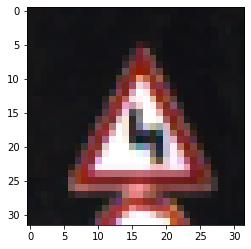

In [ ]:
plt.imshow(test["features"][80])

In [19]:
import numpy as np
import tensorflow as tf
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
save_model = tf.keras.models.load_model("ModelNhanDien.h5")
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}
for fn in uploaded.keys():
  path = './' +fn
  img = image.load_img(path, target_size=(32,32))
  x = image.img_to_array(img) / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  result = save_model.predict(images, batch_size=10)

  final = np.argmax(result)
final = classNames[final]
final


Saving aa (17).jpg to aa (17) (2).jpg


'Speed limit (50km/h)'

In [9]:
cd /content/drive/My Drive/Machine Learning

/content/drive/My Drive/Machine Learning


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
import tensorflow as tf
from google.colab import drive


save_model = tf.keras.models.load_model("BeTho.h5")

classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


for fn in uploaded.keys():
  path = './' +fn
  img = image.load_img(path, target_size=(32,32))
  x = image.img_to_array(img) / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  result = save_model.predict(images, batch_size=10)

  final = np.argmax(result)
final = classNames[final]
final

Saving images.jpg to images (1).jpg


OSError: ignored